In [2]:
#imports basicos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
#Baixa a tabela do excel
tabela = pd.read_csv(r"C:\Users\davi-\OneDrive\Área de Trabalho\Desafio Itau/Ecommerce_DBS.csv")#Coloque o path correto do seu computador para o arquivo Ecommerce_DBS.csv

#Tratamento da tabela:

#Remove os missing values 
tabela.dropna(inplace=True)

#Lista de colunas que não serão utilizadas
col_remover = ['Customer ID',"Total Purchase Amount","Country","State","Latitude","Longituide"]

#Remove as colunas
tabela.drop(columns = col_remover,inplace=True)

#O nome da coluna havia um espaço que causava erro ao chamar a coluna em algumas partes do código
tabela.rename(columns={'Customer Age ': 'Customer Age'}, inplace=True)

tabela


,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender,Source
0,08/09/2020,Electronics,12,3,7,20,Male,Instagram Campign
1,05/03/2022,Home,468,4,8,20,Male,Instagram Campign
2,23/05/2022,Home,288,2,10,20,Male,SEM
3,12/11/2020,Clothing,196,1,3,20,Male,Instagram Campign
4,27/11/2020,Home,449,1,3,20,Female,Instagram Campign
...,...,...,...,...,...,...,...,...
249995,10/08/2023,Clothing,279,2,1,55,Male,SEM
249996,23/11/2021,Home,27,1,1,42,Female,Instagram Campign
249997,02/07/2020,Home,17,5,0,41,Male,Instagram Campign
249998,30/12/2020,Books,398,2,8,34,Female,Instagram Campign


C:\Users\davi-\AppData\Local\Temp\ipykernel_24412\290863580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_ultimos_3_anos['Total Vendas'] = tabela_ultimos_3_anos['Product Price'] * tabela_ultimos_3_anos['Quantity']


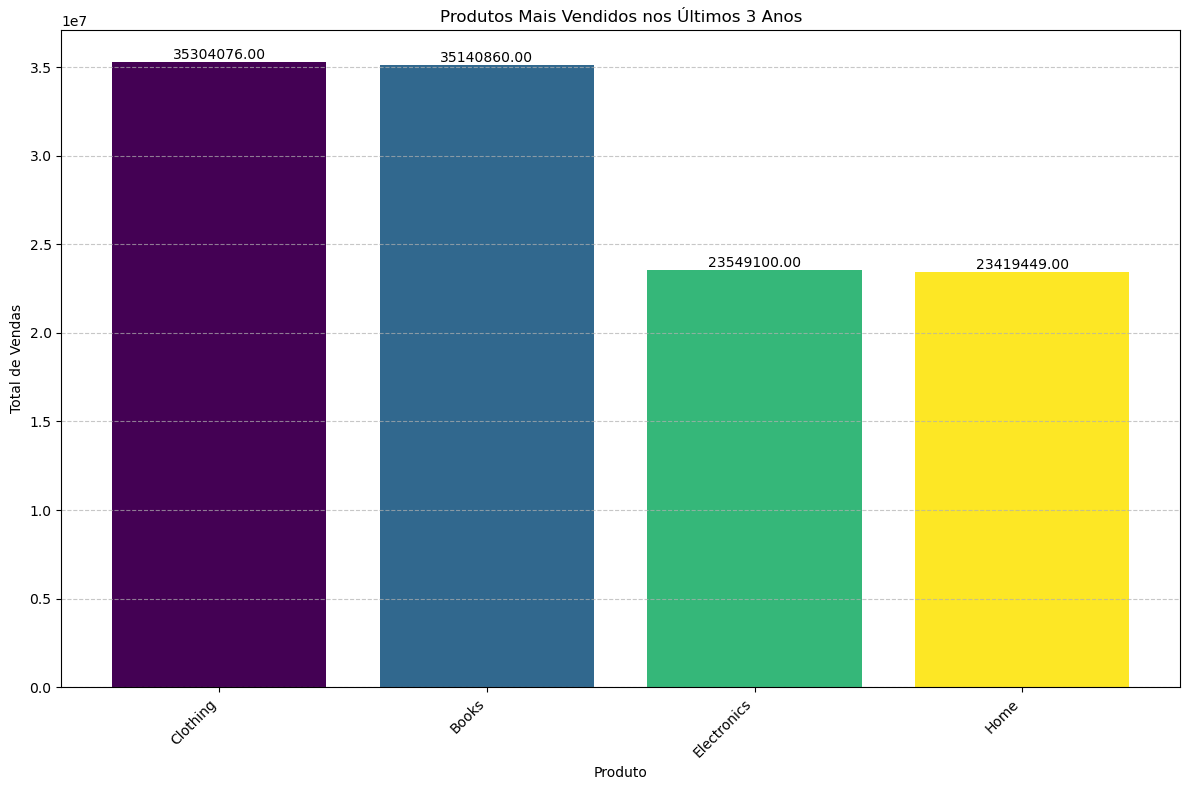

In [16]:
# Converte a coluna 'Purchase Date' para o tipo datetime, especificando que o dia vem primeiro
tabela['Purchase Date'] = pd.to_datetime(tabela['Purchase Date'], dayfirst=True)

# Filtra os dados para os últimos 3 anos
data_limite = pd.Timestamp.now() - pd.DateOffset(years=3)
tabela_ultimos_3_anos = tabela[tabela['Purchase Date'] >= data_limite]

# Calcula o total de vendas por produto
tabela_ultimos_3_anos['Total Vendas'] = tabela_ultimos_3_anos['Product Price'] * tabela_ultimos_3_anos['Quantity']
vendas_por_produto = tabela_ultimos_3_anos.groupby('Product Category')['Total Vendas'].sum().reset_index()

# Classifica os produtos pelo total de vendas em ordem decrescente
vendas_por_produto_ordenadas = vendas_por_produto.sort_values(by='Total Vendas', ascending=False)

# Cria o gráfico de barras com cores diferentes para cada barra
plt.figure(figsize=(12, 8))
cores = plt.cm.viridis(np.linspace(0, 1, len(vendas_por_produto_ordenadas)))

barras = plt.bar(vendas_por_produto_ordenadas['Product Category'], 
                 vendas_por_produto_ordenadas['Total Vendas'], 
                 color=cores)

# Adiciona rótulos e título
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.title('Produtos Mais Vendidos nos Últimos 3 Anos')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adiciona uma grade de fundo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os números de vendas em cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, 
             altura, 
             f'{altura:.2f}', 
             ha='center', 
             va='bottom')

# Ajusta o layout para evitar cortes nos rótulos
plt.tight_layout()

# Mostra o gráfico
plt.show()

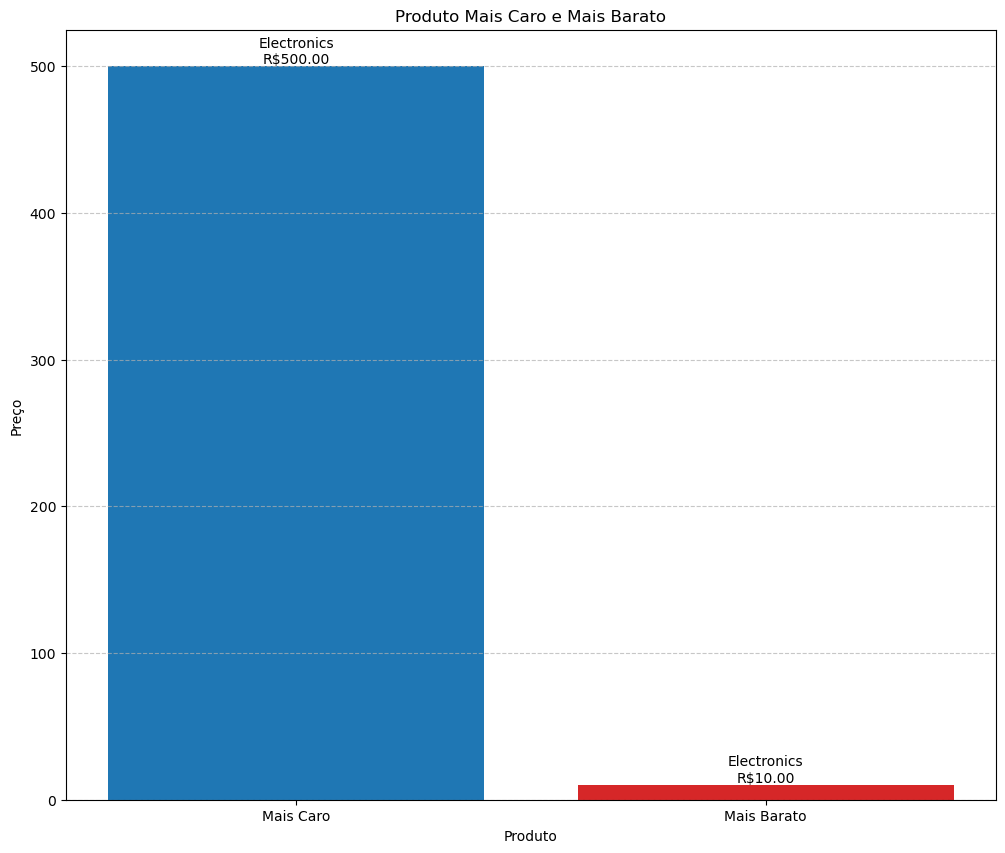

In [5]:
# Encontra o produto mais caro
indice_produto_mais_caro = tabela['Product Price'].idxmax()
produto_mais_caro = tabela.loc[indice_produto_mais_caro]

# Encontra o produto mais barato
indice_produto_mais_barato = tabela['Product Price'].idxmin()
produto_mais_barato = tabela.loc[indice_produto_mais_barato]

# Prepara dados para o gráfico
produtos = ['Mais Caro', 'Mais Barato']
precos = [produto_mais_caro['Product Price'], produto_mais_barato['Product Price']]
categorias = [produto_mais_caro['Product Category'], produto_mais_barato['Product Category']]

# Cria o gráfico de barras
plt.figure(figsize=(12, 10))
bars = plt.bar(produtos, precos, color=['tab:blue', 'tab:red'])

# Adiciona rótulos e título
plt.xlabel('Produto')
plt.ylabel('Preço')
plt.title('Produto Mais Caro e Mais Barato')

# Adiciona rótulos nas barras
for bar, categoria, preco in zip(bars, categorias, precos):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{categoria}\nR${preco:.2f}', ha='center', va='bottom')

# Adiciona grade de fundo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra o gráfico
plt.show()

A categoria mais vendida é Clothing com quantidade total vendida de 225322 unidades
A categoria menos vendida é Home com quantidade total vendida de 149698 unidades
A categoria mais cara é Home com preço médio de R$254.84
A categoria mais barata é Clothing com preço médio de R$254.45


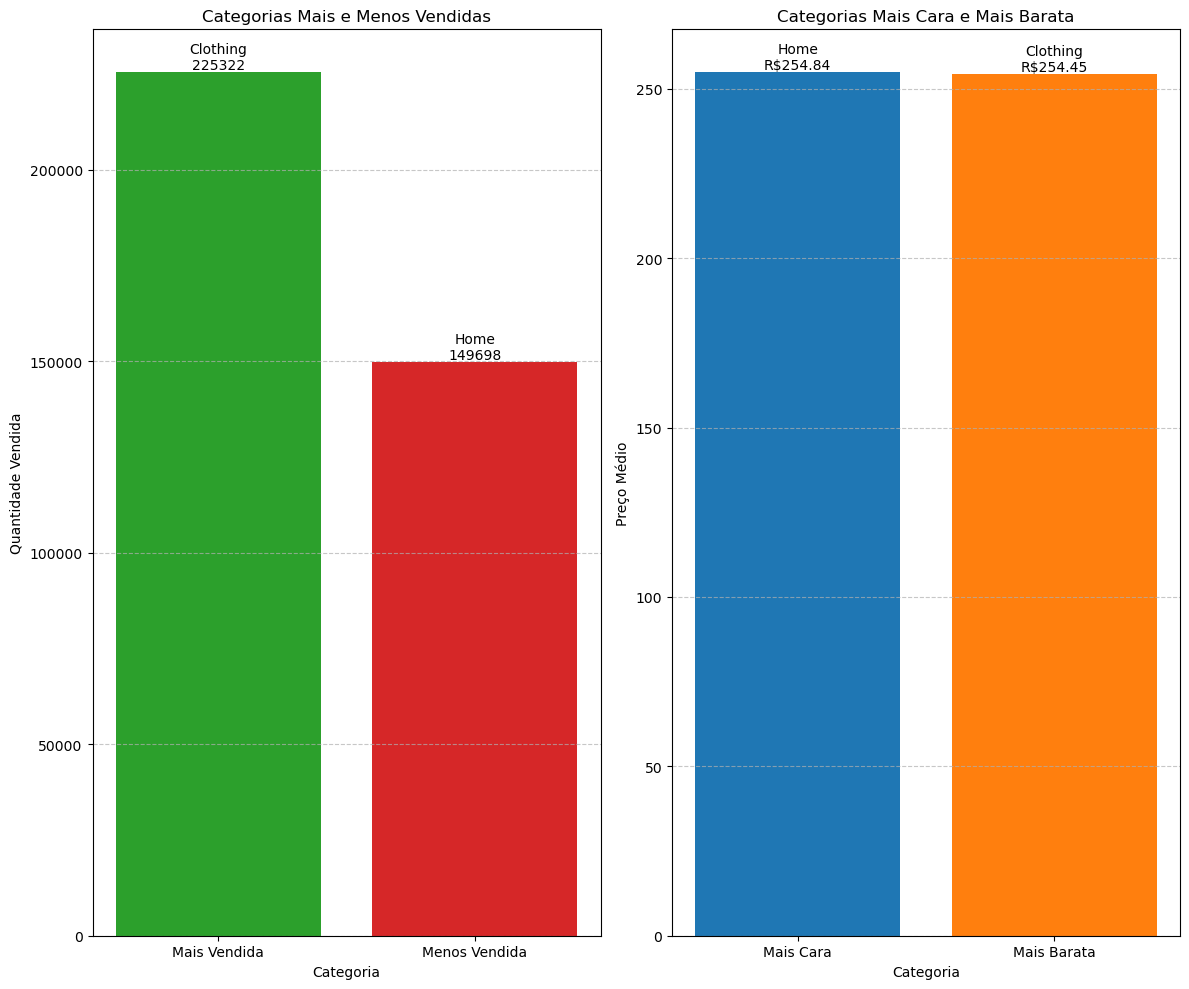

In [6]:
# Agrupa os dados pela categoria do produto e calcular a média dos preços e a soma das quantidades vendidas
categoria_stats = tabela.groupby('Product Category').agg({'Product Price': 'mean', 'Quantity': 'sum'})

# Encontra a categoria mais cara (maior média de preço)
categoria_mais_cara = categoria_stats['Product Price'].idxmax()
preco_mais_cara = categoria_stats['Product Price'].max()

# Encontra a categoria mais barata (menor média de preço)
categoria_menos_cara = categoria_stats['Product Price'].idxmin()
preco_menos_cara = categoria_stats['Product Price'].min()

# Encontra a categoria mais vendida (maior quantidade vendida)
categoria_mais_vendida = categoria_stats['Quantity'].idxmax()
quantidade_mais_vendida = categoria_stats['Quantity'].max()

# Encontra a categoria menos vendida (menor quantidade vendida)
categoria_menos_vendida = categoria_stats['Quantity'].idxmin()
quantidade_menos_vendida = categoria_stats['Quantity'].min()

print(f'A categoria mais vendida é {categoria_mais_vendida} com quantidade total vendida de {quantidade_mais_vendida} unidades')
print(f'A categoria menos vendida é {categoria_menos_vendida} com quantidade total vendida de {quantidade_menos_vendida} unidades')
print(f'A categoria mais cara é {categoria_mais_cara} com preço médio de R${preco_mais_cara:.2f}')
print(f'A categoria mais barata é {categoria_menos_cara} com preço médio de R${preco_menos_cara:.2f}')

# Plota gráficos

# Gráfico de barras para as categorias mais e menos vendidas
plt.figure(figsize=(12, 10))

# Categorias mais e menos vendidas
plt.subplot(1, 2, 1)
plt.bar(['Mais Vendida', 'Menos Vendida'], [quantidade_mais_vendida, quantidade_menos_vendida], color=['tab:green', 'tab:red'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.title('Categorias Mais e Menos Vendidas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona anotações
plt.text(0, quantidade_mais_vendida, f'{categoria_mais_vendida}\n{quantidade_mais_vendida}', ha='center', va='bottom')
plt.text(1, quantidade_menos_vendida, f'{categoria_menos_vendida}\n{quantidade_menos_vendida}', ha='center', va='bottom')

# Categorias mais cara e mais barata
plt.subplot(1, 2, 2)
plt.bar(['Mais Cara', 'Mais Barata'], [preco_mais_cara, preco_menos_cara], color=['tab:blue', 'tab:orange'])
plt.xlabel('Categoria')
plt.ylabel('Preço Médio')
plt.title('Categorias Mais Cara e Mais Barata')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona anotações
plt.text(0, preco_mais_cara, f'{categoria_mais_cara}\nR${preco_mais_cara:.2f}', ha='center', va='bottom')
plt.text(1, preco_menos_cara, f'{categoria_menos_cara}\nR${preco_menos_cara:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


O produto com o melhor NPS é Home com NPS de 10
O produto com o pior NPS é Clothing com NPS de 0


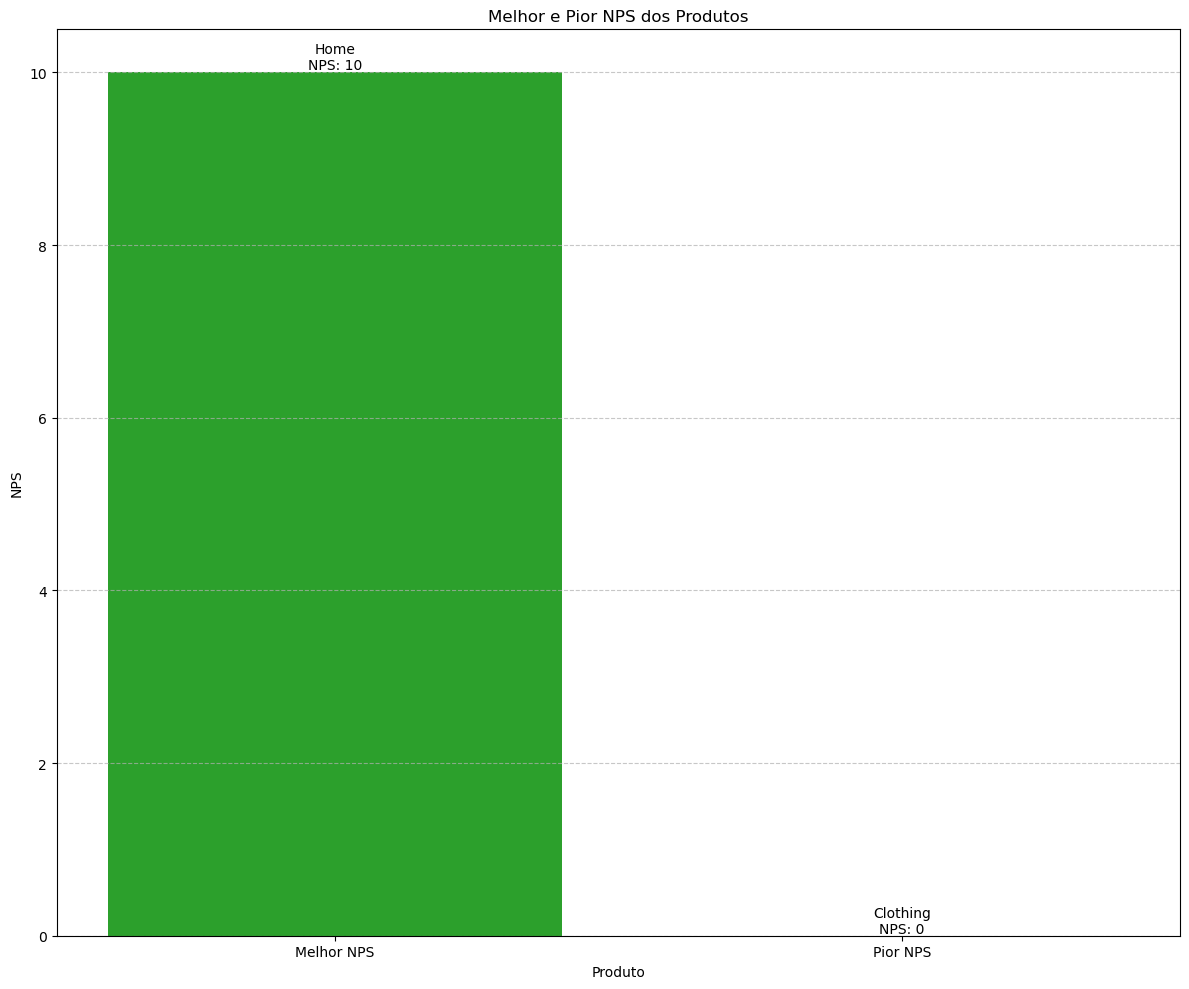

In [7]:
# Encontra o produto com o melhor NPS (maior valor)
melhor_nps = tabela.loc[tabela['NPS'].idxmax()]

# Encontra o produto com o pior NPS (menor valor)
pior_nps = tabela.loc[tabela['NPS'].idxmin()]

print(f'O produto com o melhor NPS é {melhor_nps["Product Category"]} com NPS de {melhor_nps["NPS"]}')
print(f'O produto com o pior NPS é {pior_nps["Product Category"]} com NPS de {pior_nps["NPS"]}')

# Plotar gráfico
plt.figure(figsize=(12, 10))

# Gráfico de barras para os produtos com melhor e pior NPS
plt.bar(['Melhor NPS', 'Pior NPS'], [melhor_nps['NPS'], pior_nps['NPS']], color=['tab:green', 'orange'])
plt.xlabel('Produto')
plt.ylabel('NPS')
plt.title('Melhor e Pior NPS dos Produtos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona anotações
plt.text(0, melhor_nps['NPS'], f'{melhor_nps["Product Category"]}\nNPS: {melhor_nps["NPS"]}', ha='center', va='bottom')
plt.text(1, pior_nps['NPS'], f'{pior_nps["Product Category"]}\nNPS: {pior_nps["NPS"]}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [18]:
# Agrupa os dados pela categoria do produto, gênero e idade, e calcule a média do NPS
categoria_publico_nps = tabela.groupby(['Product Category', 'Gender', 'Customer Age']).agg({'NPS': 'mean'})

# Encontra o tipo de público e canal ideal para cada categoria de produto
for categoria, dados in categoria_publico_nps.groupby(level=0):
    print(f'\nCategoria: {categoria}')
    melhor_publico = dados['NPS'].idxmax()
    melhor_canal = tabela.loc[(tabela['Product Category'] == categoria) & (tabela['Gender'] == melhor_publico[1]) & (tabela['Customer Age'] == melhor_publico[2]), 'Source'].iloc[0]
    print(f'Melhor público: {melhor_publico[1]} com idade {melhor_publico[2]}')
    print(f'Canal ideal para venda: {melhor_canal}')




Categoria: Books
Melhor público: Male com idade 62
Canal ideal para venda: Instagram Campign

Categoria: Clothing
Melhor público: Female com idade 66
Canal ideal para venda: Instagram Campign

Categoria: Electronics
Melhor público: Male com idade 56
Canal ideal para venda: SEM

Categoria: Home
Melhor público: Male com idade 53
Canal ideal para venda: Instagram Campign
